In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('D:\Mario\programacion\Ai\MovieRecommender\movies_dataset.csv')

In [3]:
movies.head()

,Unnamed: 0,User_Id,Movie_Name,Rating,Genre
0,0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,3,1,Underground (1995),5.0,Comedy|Drama|War
4,4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance


In [4]:
movies.drop(["Unnamed: 0"], axis = 1 , inplace = True)
movies.tail()

,User_Id,Movie_Name,Rating,Genre
25000090,162541,Ratatouille (2007),4.5,Animation|Children|Drama
25000091,162541,Bee Movie (2007),2.5,Animation|Comedy
25000092,162541,Alvin and the Chipmunks (2007),2.0,Children|Comedy
25000093,162541,"Dark Knight, The (2008)",4.0,Action|Crime|Drama|IMAX
25000094,162541,Milk (2008),5.0,Drama


In [5]:
movies['Year'] = movies['Movie_Name'].str.extract(r"\((\d+)\)")
movies['Movie_Name'] = movies['Movie_Name'].str.replace(r"\(.*\)", "")
movies.head()

,User_Id,Movie_Name,Rating,Genre,Year
0,1,Pulp Fiction,5.0,Comedy|Crime|Drama|Thriller,1994
1,1,Three Colors: Red,3.5,Drama,1994
2,1,Three Colors: Blue,5.0,Drama,1993
3,1,Underground,5.0,Comedy|Drama|War,1995
4,1,Singin' in the Rain,3.5,Comedy|Musical|Romance,1952


In [6]:
movies['User_Id'] = movies['User_Id']-1

In [7]:
genres_list = []
for i in movies['Genre']:
    genres_list.extend(i.split('|'))

In [8]:
id_list = {}
for i in movies['User_Id']:
    if movies['User_Id'][i] in id_list:
        id_list[movies['User_Id'][i]] += 1
    else:
        id_list[movies['User_Id'][i]] = 1

In [9]:
unique_movies = movies['Movie_Name'].drop_duplicates()
unique_rest =movies.groupby('Movie_Name').agg({'Rating':'mean','Genre':'first', 'Year':'first'})
unique= pd.merge(unique_movies,unique_rest,on='Movie_Name')
unique

,Movie_Name,Rating,Genre,Year
0,Pulp Fiction,4.188912,Comedy|Crime|Drama|Thriller,1994
1,Three Colors: Red,4.072967,Drama,1994
2,Three Colors: Blue,3.981409,Drama,1993
3,Underground,3.942052,Comedy|Drama|War,1995
4,Singin' in the Rain,4.050987,Comedy|Musical|Romance,1952
...,...,...,...,...
54969,Bombay Dreams,2.000000,Comedy|Drama,2006
54970,Den frusna leoparden,2.000000,(no genres listed),1986
54971,Tough Luck,2.000000,Action|Adventure|Thriller,2004
54972,I Don't Speak English,3.500000,Comedy,1995


In [10]:
df_mix = unique[['Genre','Movie_Name','Year']]
df_mix['Genre'] = df_mix['Genre'].str.replace("|", " ")
df_mix['all'] = ''
df_mix['all'] = df_mix['Genre'].astype(str)+" "+df_mix['Movie_Name'].astype(str)+""+df_mix['Year'].astype(str)
df_mix.set_index('Movie_Name',inplace=True)
df_mix = df_mix['all']

In [11]:
unique.set_index('Movie_Name',inplace=True)
unique

,Rating,Genre,Year
Movie_Name,,,
Pulp Fiction,4.188912,Comedy|Crime|Drama|Thriller,1994
Three Colors: Red,4.072967,Drama,1994
Three Colors: Blue,3.981409,Drama,1993
Underground,3.942052,Comedy|Drama|War,1995
Singin' in the Rain,4.050987,Comedy|Musical|Romance,1952
...,...,...,...
Bombay Dreams,2.000000,Comedy|Drama,2006
Den frusna leoparden,2.000000,(no genres listed),1986
Tough Luck,2.000000,Action|Adventure|Thriller,2004


In [12]:
df_rating = unique['Rating']
hybrid = pd.merge(df_mix,df_rating,on='Movie_Name')
hybrid

,all,Rating
Movie_Name,,
Pulp Fiction,Comedy Crime Drama Thriller Pulp Fiction 1994,4.188912
Three Colors: Red,Drama Three Colors: Red 1994,4.072967
Three Colors: Blue,Drama Three Colors: Blue 1993,3.981409
Underground,Comedy Drama War Underground 1995,3.942052
Singin' in the Rain,Comedy Musical Romance Singin' in the Rain 1952,4.050987
...,...,...
Bombay Dreams,Comedy Drama Bombay Dreams 2006,2.000000
Den frusna leoparden,(no genres listed) Den frusna leoparden 1986,2.000000
Tough Luck,Action Adventure Thriller Tough Luck 2004,2.000000


In [13]:
movies.loc[movies['Movie_Name']=='xXx ']

,User_Id,Movie_Name,Rating,Genre,Year
437,2,xXx,3.5,Action|Crime|Thriller,2002
7096,56,xXx,0.5,Action|Crime|Thriller,2002
19293,159,xXx,2.5,Action|Crime|Thriller,2002
21312,170,xXx,4.0,Action|Crime|Thriller,2002
23167,180,xXx,2.0,Action|Crime|Thriller,2002
...,...,...,...,...,...
24956358,162293,xXx,1.5,Action|Crime|Thriller,2002
24970293,162385,xXx,3.0,Action|Crime|Thriller,2002
24985012,162481,xXx,2.5,Action|Crime|Thriller,2002
24991390,162511,xXx,4.0,Action|Crime|Thriller,2002


In [14]:
unique_movies = movies['Movie_Name'].drop_duplicates()
unique_rest =movies.groupby('Movie_Name').agg({'Rating':'mean','Genre':'first', 'Year':'first'})
unique= pd.merge(unique_movies,unique_rest,on='Movie_Name')
unique

,Movie_Name,Rating,Genre,Year
0,Pulp Fiction,4.188912,Comedy|Crime|Drama|Thriller,1994
1,Three Colors: Red,4.072967,Drama,1994
2,Three Colors: Blue,3.981409,Drama,1993
3,Underground,3.942052,Comedy|Drama|War,1995
4,Singin' in the Rain,4.050987,Comedy|Musical|Romance,1952
...,...,...,...,...
54969,Bombay Dreams,2.000000,Comedy|Drama,2006
54970,Den frusna leoparden,2.000000,(no genres listed),1986
54971,Tough Luck,2.000000,Action|Adventure|Thriller,2004
54972,I Don't Speak English,3.500000,Comedy,1995


(-1.25, 1.25, -1.25, 1.25)

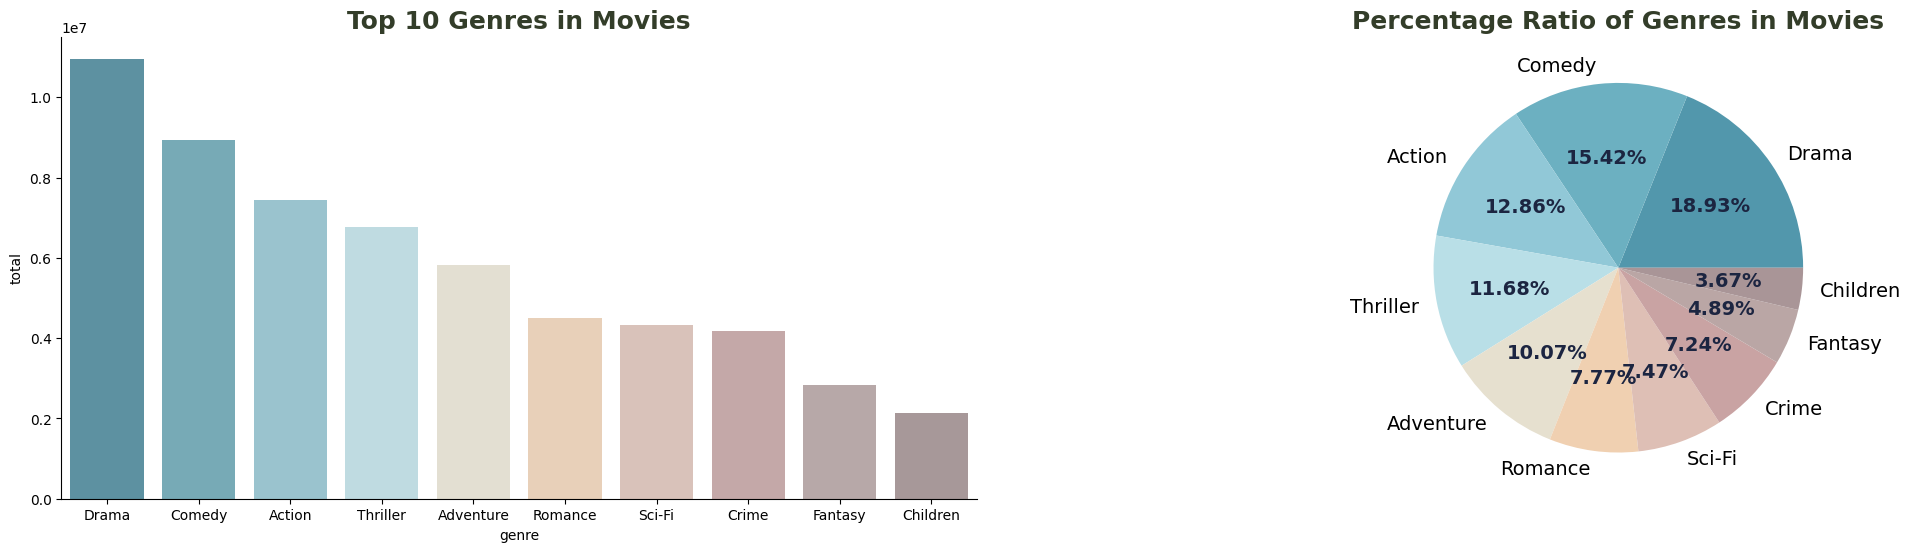

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(26,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(10), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#5297AC', '#6CB0C1', '#91C8D7', '#B9DFE7', '#E6E0CF','#F0D0B1','#DEBFB5','#C9A3A3','#BAA6A5','#A99597'])
ax.set_title('Top 10 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()
df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
plt.title('Percentage Ratio of Genres in Movies', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0,0,0,0,0], colors=['#5297AC', '#6CB0C1', '#91C8D7', '#B9DFE7', '#E6E0CF','#F0D0B1','#DEBFB5','#C9A3A3','#BAA6A5','#A99597'])
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

(-1.25, 1.25, -1.25, 1.25)

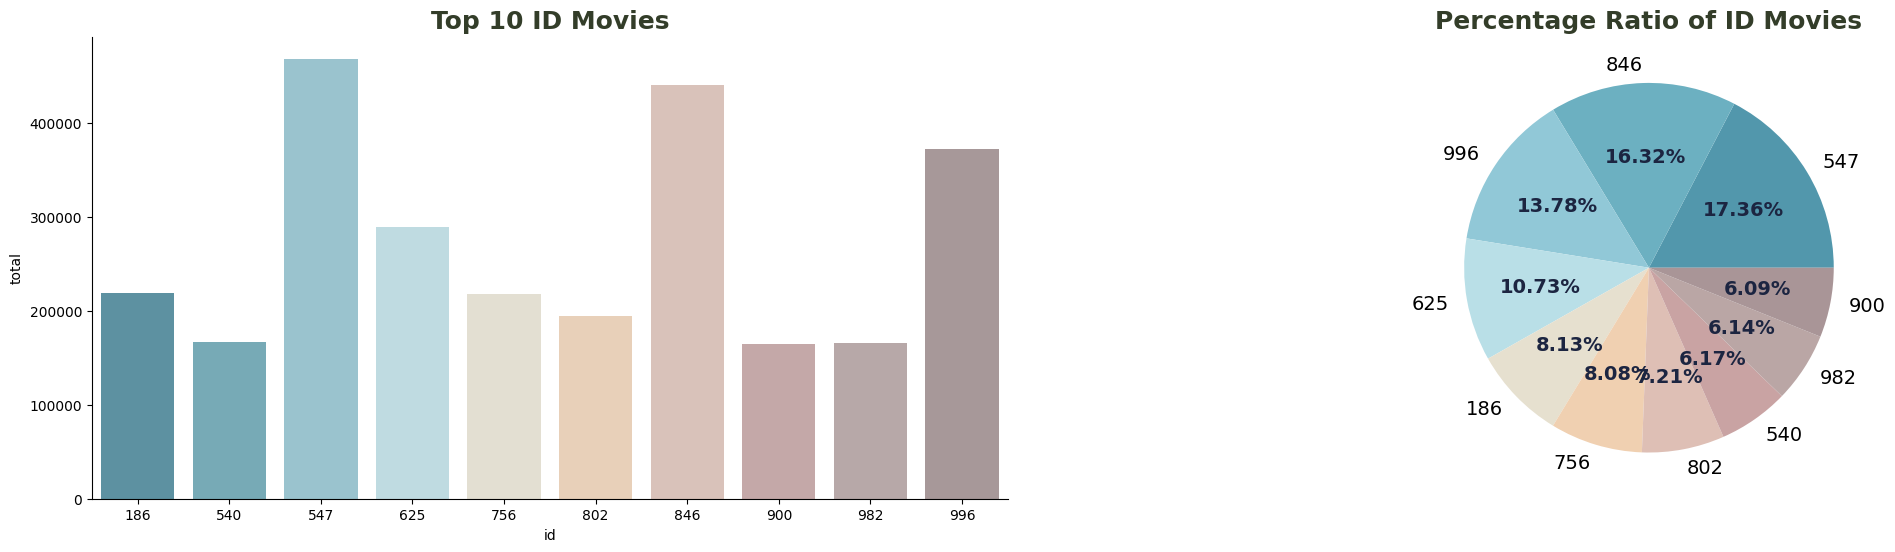

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(26,6))

df_plot = pd.DataFrame(Counter(id_list).most_common(10), columns=['id', 'total'])
ax = sns.barplot(data=df_plot, x='id', y='total', ax=axes[0], palette=['#5297AC', '#6CB0C1', '#91C8D7', '#B9DFE7', '#E6E0CF','#F0D0B1','#DEBFB5','#C9A3A3','#BAA6A5','#A99597'])
ax.set_title('Top 10 ID Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()
df_plot_full = pd.DataFrame([Counter(id_list)]).transpose().sort_values(by=0, ascending=False)
plt.title('Percentage Ratio of ID Movies', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['id'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0,0,0,0,0], colors=['#5297AC', '#6CB0C1', '#91C8D7', '#B9DFE7', '#E6E0CF','#F0D0B1','#DEBFB5','#C9A3A3','#BAA6A5','#A99597'])
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

(-1.25, 1.25, -1.25, 1.25)

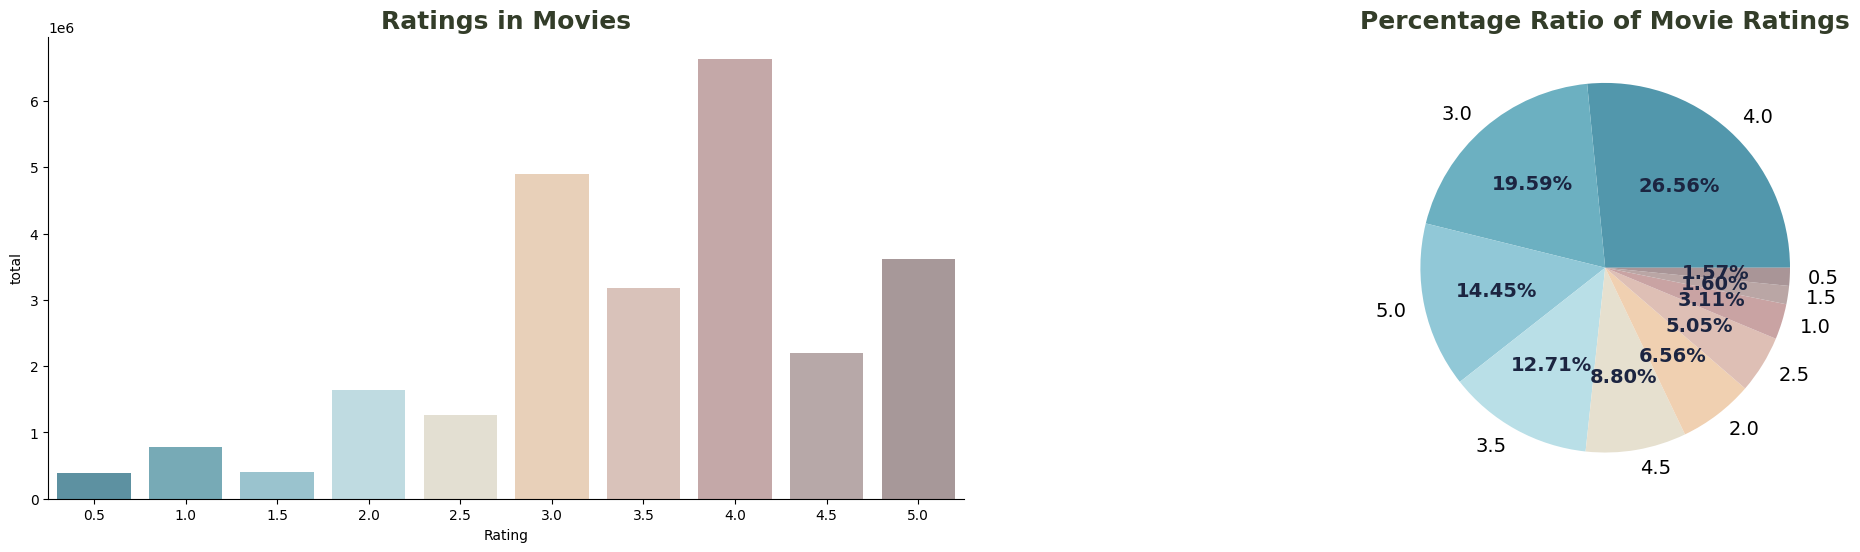

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(26,6))

df_plot = pd.DataFrame(Counter(movies['Rating']).most_common(10), columns=['Rating', 'total'])
ax = sns.barplot(data=df_plot, x='Rating', y='total', ax=axes[0], palette=['#5297AC', '#6CB0C1', '#91C8D7', '#B9DFE7', '#E6E0CF','#F0D0B1','#DEBFB5','#C9A3A3','#BAA6A5','#A99597'])
ax.set_title('Ratings in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()
df_plot_full = pd.DataFrame([Counter(movies['Rating'])]).transpose().sort_values(by=0, ascending=False)
plt.title('Percentage Ratio of Movie Ratings', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['Rating'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0,0,0,0,0], colors=['#5297AC', '#6CB0C1', '#91C8D7', '#B9DFE7', '#E6E0CF','#F0D0B1','#DEBFB5','#C9A3A3','#BAA6A5','#A99597'])
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

In [18]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(hybrid['all'])
cos_sim = cosine_similarity(tfidf_matrix)

In [ ]:
ratings_matrixna = movies.pivot_table(index='Movie_Name', columns= 'User_Id', values= 'Rating')
ratings_matrix = ratings_matrixna.fillna(0)
#movie_similarity_collab = cosine_similarity(ratings_matrix)

In [ ]:
user_matrixna = movies.pivot_table(index='User_Id', columns= 'Movie_Name', values= 'Rating')
user_matrix = user_matrixna.fillna(0)
movie_similarity_collab = cosine_similarity(user_matrix)

In [ ]:
def predict(title, similarity_weight=0.8, top_n=50):
    data = hybrid.reset_index()
    index_movie = unique[unique['Movie_Name'] == title].index
    similarity = cos_sim[index_movie].T
   
    sim_df = pd.DataFrame(similarity, columns=['similarity'])
    final_df = pd.concat([unique, sim_df], axis=1)
    # You can also play around with the number
    final_df['final_score'] = final_df['Rating']*(1-similarity_weight) + final_df['similarity']*similarity_weight
    
    final_df_sorted = final_df.sort_values(by='final_score', ascending=False).head(top_n)
    final_df_sorted.set_index('Movie_Name', inplace=True)
    return final_df_sorted[['Rating', 'similarity', 'final_score']]

In [ ]:
def recommend_movies(user_id, n=50):
    # Obtener las puntuaciones del usuario
    user_ratings = ratings_matrixna[user_id]
   
    # Calcular las puntuaciones predichas para todas las películas que el usuario no ha visto
    rated_movies = user_ratings.isna()
    rated_movies = rated_movies.drop(rated_movies[rated_movies==True].index)
    predicted_ratings = pd.Series()
    for i in range(rated_movies.shape[0]):
        #AÑADIR A LISTA LAS PELICULAS PARA QUITAR LAS VISTAS
        x= pd.Series()
        x = predict(rated_movies.index[i])
        predicted_ratings = pd.concat([predicted_ratings,x])
    predicted_ratings = predicted_ratings.groupby(predicted_ratings.index).sum()
    predicted_ratings.drop(['Rating'], axis = 1 , inplace = True)
    predicted_ratings.drop(['similarity'], axis = 1 , inplace = True)
    rated_movies = rated_movies[rated_movies.index.isin(predicted_ratings.index)]
    predicted_ratings.drop(rated_movies.index, inplace=True)
    # Ordenar las películas según las puntuaciones predichas y recomendar las primeras n películas
    recommended_movies = predicted_ratings.sort_values(by= 'final_score',ascending=False)['final_score'][:n]
    return recommended_movies

In [ ]:
def collab_recommendation(user_id, n=50):
    similar_users = np.argsort(movie_similarity_collab[user_id])[::-1][1:n+1]
    not_seen = user_matrixna.loc[user_id].isna()
    predicted_ratings = user_matrix.loc[similar_users, not_seen].apply(lambda x: np.average(x, weights=movie_similarity_collab[user_id][similar_users]), axis=0)
    recommended_movies = predicted_ratings.sort_values(ascending=False)[:n]
    return recommended_movies

In [ ]:
def hybrid_recommendation(user_id, n=15):
    s_collab = collab_recommendation(user_id)
    s_collab = (s_collab - s_collab.min()) / (s_collab.max() - s_collab.min())
    s_recom = recommend_movies(user_id)
    s_recom = (s_recom - s_recom.min()) / (s_recom.max() - s_recom.min())
    recommended_movies = pd.concat([s_collab, s_recom])
    recommended_movies = recommended_movies.groupby(recommended_movies.index).sum()
    recommended_movies = recommended_movies.sort_values(ascending=False)[:n]
    return recommended_movies

In [ ]:
recommend_movies(2)

Class of 1999                                 368.546659
The Blue Lamp                                 367.352050
Zenon: The Zequel                             363.706188
G.O.R.A.                                      353.169242
Gunbuster                                     352.463453
Age of Ice                                    333.779681
The Zero Boys                                 331.915180
2019: After the Fall of New York              330.802521
The Night of the Sunflowers                   329.840119
Princess of Thieves                           326.607764
The Ugly Swans                                317.756088
Street Fighter: Assassin's Fist               313.474234
Damnation Alley                               294.931786
Adversary, The                                285.127311
Strangers                                     284.946945
Rewind                                        267.805464
Tykho Moon                                    244.751845
I Love You, I Love You         

In [ ]:
collab_recommendation(2).index

Index(['Seven ', 'Up ', 'Saving Private Ryan ',
       'Harry Potter and the Sorcerer's Stone ', 'Sixth Sense, The ',
       'Deadpool ', 'Good Will Hunting ', 'Green Mile, The ', 'Braveheart ',
       'Indiana Jones and the Last Crusade ', 'Men in Black ',
       'Slumdog Millionaire ', 'The Butterfly Effect ',
       'Kingsman: The Secret Service ', 'Donnie Darko ',
       'The Hobbit: The Battle of the Five Armies ', 'Cloud Atlas ',
       'Die Hard ', 'Life of Pi ', 'Groundhog Day ',
       'Indiana Jones and the Temple of Doom ', 'John Wick ', 'Titanic ',
       'Moon ', 'Spider-Man 2 ', 'Spirited Away ',
       'One Flew Over the Cuckoo's Nest ', 'Rain Man ', 'Lion King, The ',
       'Amelie ', 'Back to the Future Part II ', 'The Hateful Eight ',
       'Pursuit of Happyness, The ', 'Argo ', 'Ocean's Thirteen ',
       'Scott Pilgrim vs. the World ', 'Toy Story 2 ', 'Fargo ',
       'Requiem for a Dream ', 'Aladdin ', 'A.I. Artificial Intelligence ',
       'Lucky Number Slevin 

In [ ]:
hybrid_recommendation(2)

Seven                                     1.000000
Class of 1999                             1.000000
The Blue Lamp                             0.994685
Zenon: The Zequel                         0.978464
G.O.R.A.                                  0.931585
Gunbuster                                 0.928445
Up                                        0.925408
Saving Private Ryan                       0.887669
Harry Potter and the Sorcerer's Stone     0.846281
Age of Ice                                0.845319
The Zero Boys                             0.837024
2019: After the Fall of New York          0.832073
The Night of the Sunflowers               0.827792
Princess of Thieves                       0.813411
Sixth Sense, The                          0.792877
dtype: float64